<a href="https://colab.research.google.com/github/bab81/KMeans_vs_SOM_Clustering/blob/main/22_Project_Unsupervised_Supervised_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

1.  Mushroom dataset: 
> *   Each record represent a different type of mushroom
> *   Each feature respresent a different characteristics of mushrooms

> Mushrooms are labled as eatable and not eatable mushrooms

> Source: https://www.kaggle.com/uciml/mushroom-classification



## Load Dataset

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv('mushrooms.csv')

In [ ]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

## Pre-processing

### Encoding

<font color=red>Do NOT encode IDs in your features!</font>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data:
    data[column]=le.fit_transform(data[column])

In [ ]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


### Mark features and Label (optional)




In [ ]:
features=data.drop(columns=['class'])
label=data['class']

In [ ]:
features.dtypes

cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [ ]:
label

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

<font color=red>0 means eatable!

### Visualize data - Simple understanding

"A picture is worth ten thousand word" Fred R. Bernard, 1927

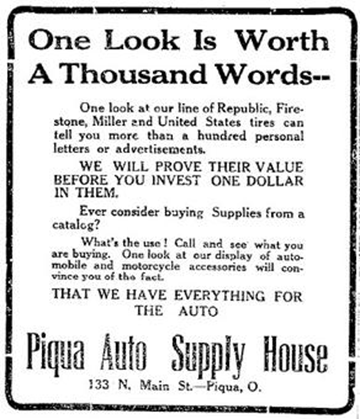



#### Data is balanced?!

<Axes: xlabel='count', ylabel='class'>

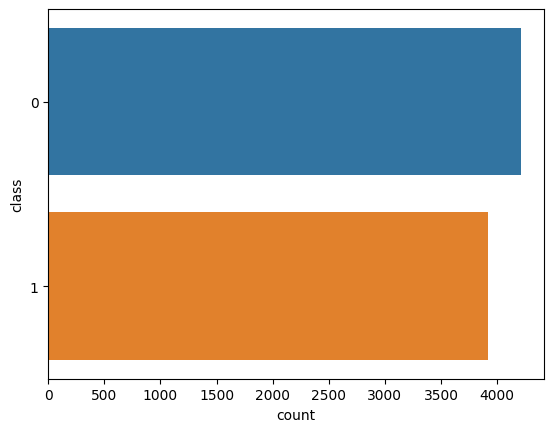

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y=label)

#### Pairplot; how features are help distinguishing between classes?

<Axes: xlabel='gill-size', ylabel='count'>

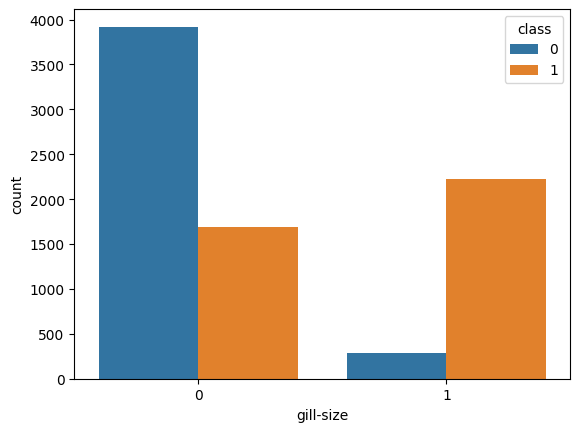

In [ ]:
sns.countplot(x='gill-size',data=features,hue=label)

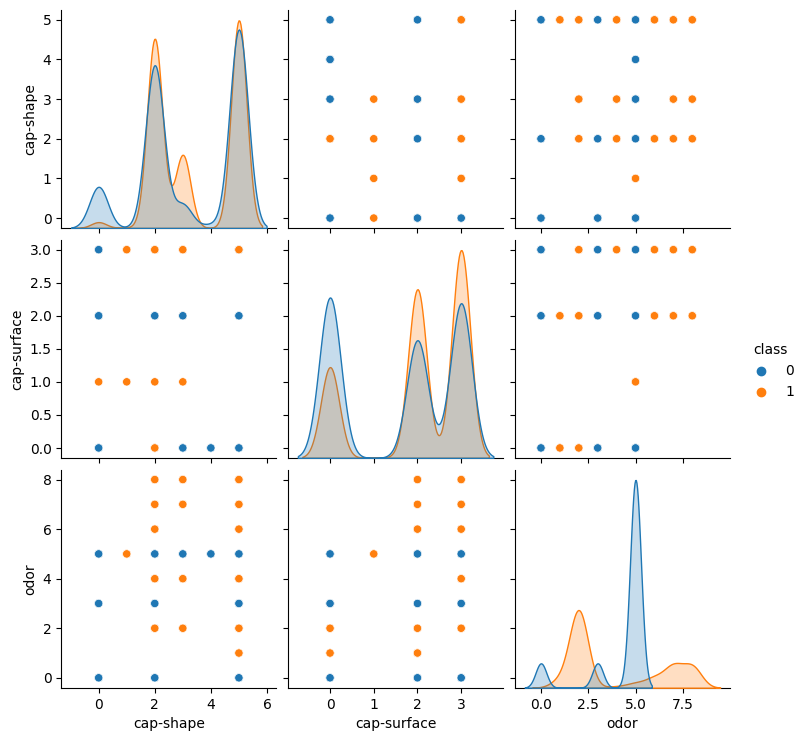

In [ ]:
sns.pairplot(data[['cap-shape','cap-surface','odor','class']],hue="class")

#### Correlation of features?

<Axes: >

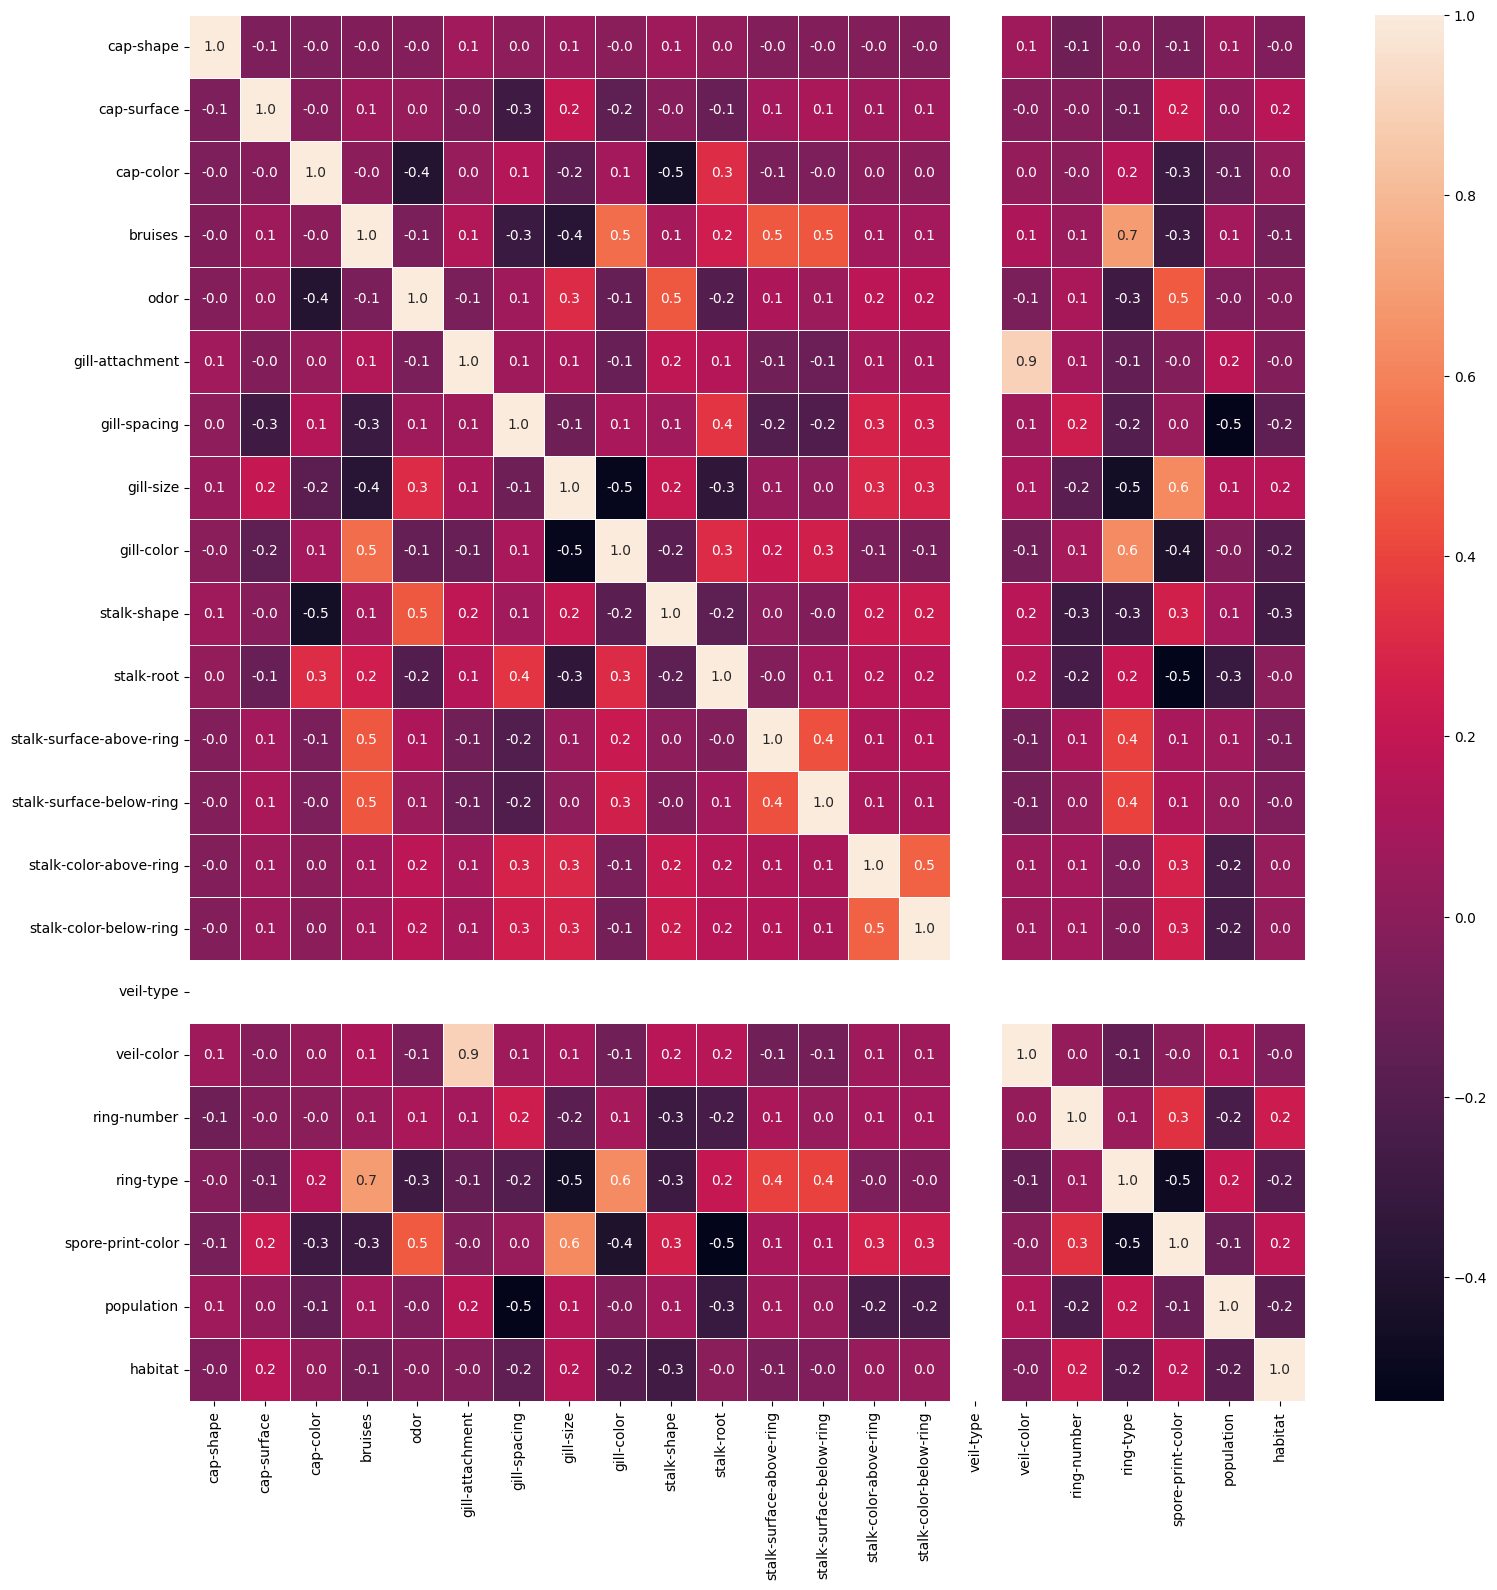

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

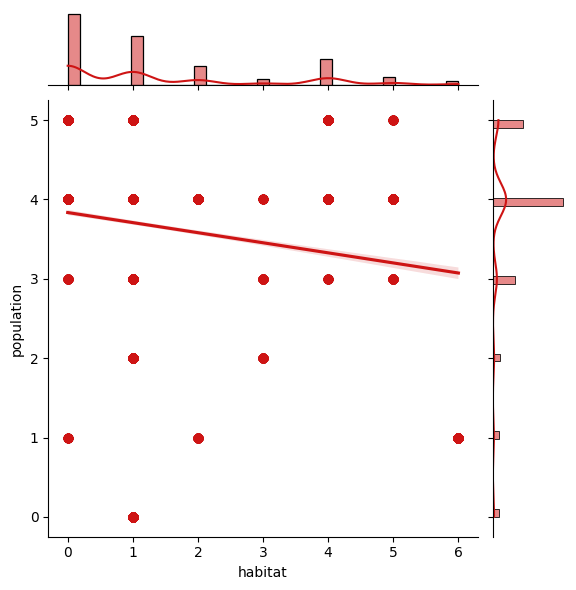

In [ ]:
#sns.jointplot(features.loc[:,'habitat'], features.loc[:,'population'], kind="reg", color="#ce1414")

sns.jointplot(x='habitat', y='population', data=features, kind="reg", color="#ce1414")


### Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
scaled_features=SS.fit_transform(features)

In [ ]:
scaled_features

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
scaled_features_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(scaled_features, label, test_size=0.3)

## Model Selection?!

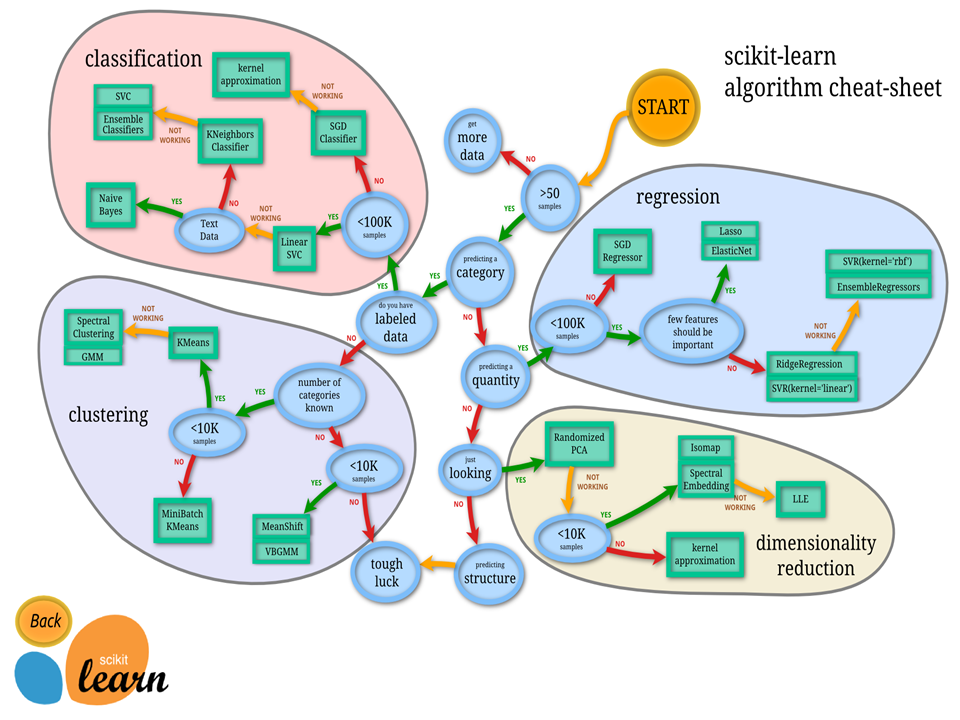

Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/


### Linear SVC?

source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(X_training, Y_training)
svc_model_prediction=svc_model.predict(X_testing)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('SVC result:')
print('Accuracy: ',accuracy_score(Y_testing,svc_model_prediction))
print('f1_score: ', f1_score(Y_testing,svc_model_prediction,average='weighted'))
print('Precision: ', precision_score(Y_testing,svc_model_prediction,average='weighted'))
print('Recall: ', recall_score(Y_testing,svc_model_prediction,average='weighted'))

SVC result:
Accuracy:  0.9413453650533224
f1_score:  0.9413419994762923
Precision:  0.9413769706724507
Recall:  0.9413453650533224


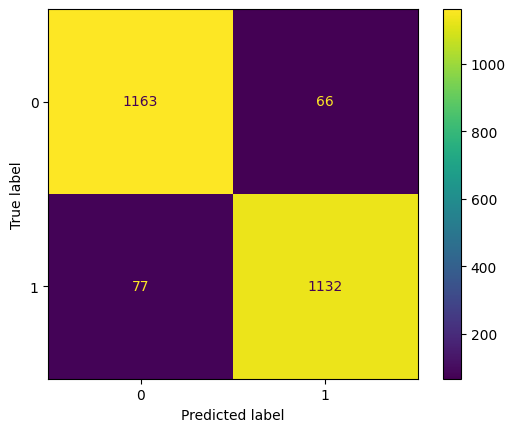

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(svc_model,X_testing,Y_testing)

from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import confusion_matrix 

confusion_matrix = confusion_matrix(Y_testing, svc_model_prediction) 
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
LGR_model = LogisticRegression(max_iter=1000)
LGR_model.fit(X_training,Y_training)
LGR_model_prediction=LGR_model.predict(X_testing)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_testing,LGR_model_prediction))
print('f1_score: ', f1_score(Y_testing,LGR_model_prediction,average='weighted'))
print('Precision: ', precision_score(Y_testing,LGR_model_prediction,average='weighted'))
print('Recall: ', recall_score(Y_testing,LGR_model_prediction,average='weighted'))

LGC result:
Accuracy:  0.9454470877768663
f1_score:  0.9454439575548734
Precision:  0.9454793312184061
Recall:  0.9454470877768663


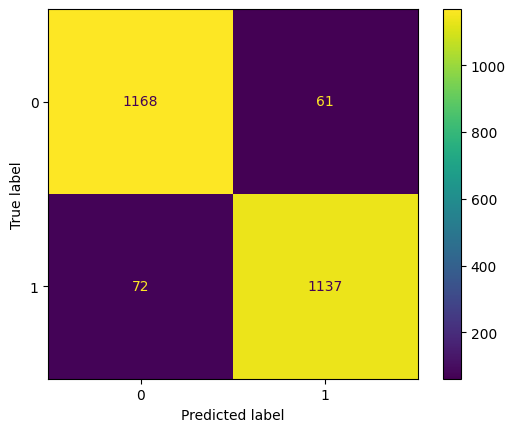

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(LGR_model,X_testing,Y_testing)

from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import confusion_matrix 

confusion_matrix = confusion_matrix(Y_testing, LGR_model_prediction) 
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot()

## Unsupervised Analysis/Clustering

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=177bc6ca12ee88cbac594bd19260aed467ff78cd3ee7190ec09fb634500b7a28
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
som_model=MiniSom(10,10,22,sigma=0.4, learning_rate=0.2)
som_model.train(X_training,50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.6849708166010517


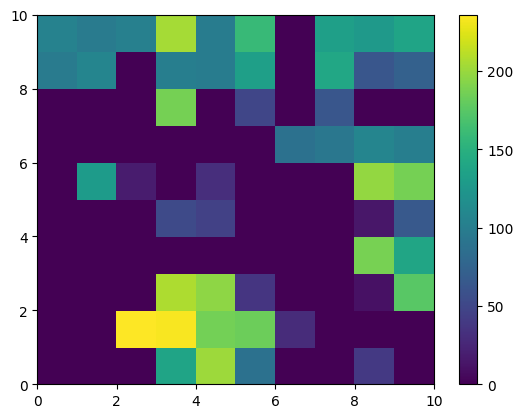

In [ ]:
activation=som_model.activation_response(X_training)
import matplotlib.pyplot as plt
plt.pcolor(activation.T) 
plt.colorbar()
plt.show()

In [ ]:
X_training_qnt=som_model.quantization(X_training)

In [ ]:
from sklearn.linear_model import LogisticRegression
LGR_model_2nd_layer = LogisticRegression(max_iter=1000)
LGR_model_2nd_layer.fit(X_training_qnt,Y_training)
LGR_model_2nd_layer_prediction=LGR_model_2nd_layer.predict(som_model.quantization(X_testing))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_testing,LGR_model_2nd_layer_prediction))
print('f1_score: ', f1_score(Y_testing,LGR_model_2nd_layer_prediction,average='weighted'))
print('Precision: ', precision_score(Y_testing,LGR_model_2nd_layer_prediction,average='weighted'))
print('Recall: ', recall_score(Y_testing,LGR_model_2nd_layer_prediction,average='weighted'))

LGC result:
Accuracy:  0.9881050041017228
f1_score:  0.9880962069713796
Precision:  0.9883685296029069
Recall:  0.9881050041017228


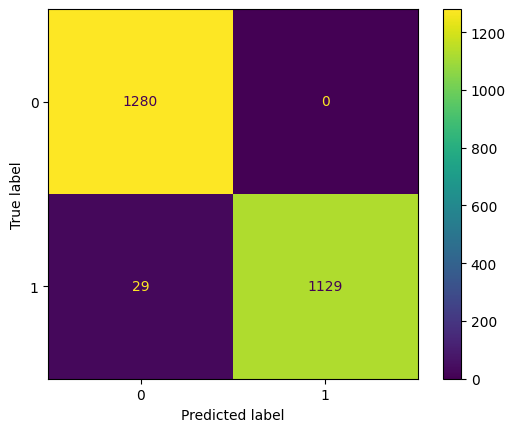

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(LGR_model_2nd_layer,som_model.quantization(X_testing),Y_testing)

from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import confusion_matrix 

confusion_matrix = confusion_matrix(Y_testing, LGR_model_2nd_layer_prediction) 
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot()
